Question 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

TASK-1

In [ ]:
url_1 = '/content/titanic.csv'
data_1 = pd.read_csv(url_1)
data_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data_1 = data_1.drop('PassengerId', axis = 1)
data_1 = data_1.drop('Name', axis = 1)
data_1 = data_1.drop('Ticket', axis = 1)
data_1 = data_1.drop('Cabin', axis = 1)


In [ ]:
data_1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
data_1.columns[data_1.isnull().any()]

Index(['Age', 'Embarked'], dtype='object')

In [ ]:
len(data_1.columns[data_1.isnull().any()])

2

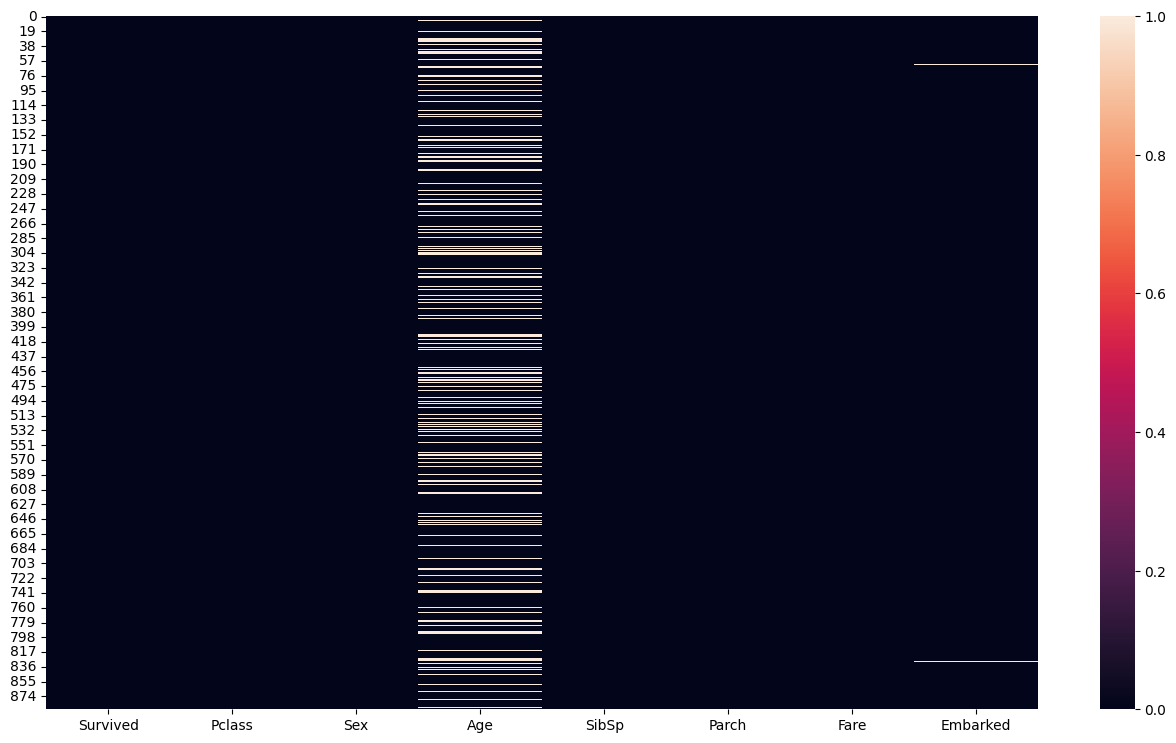

In [ ]:
# show the null values using the heatmap
plt.figure(figsize=(16,9))
sns.heatmap(data_1.isnull())
plt.show()

In [ ]:
print(round(data_1.groupby(['Sex', 'Pclass'])['Age'].agg(['mean']), 0))
data_1['Embarked'] = data_1['Embarked'].fillna(data_1['Embarked'].mode()[0])


               mean
Sex    Pclass      
female 1       35.0
       2       29.0
       3       22.0
male   1       41.0
       2       31.0
       3       27.0


In [ ]:
data_1.columns[data_1.isnull().any()]

Index(['Age'], dtype='object')

In [ ]:
# Handling the missing values of age
data_1["Age"] = data_1["Age"].fillna(-1)

for data_index in range(data_1.shape[0]):
  if data_1["Age"][data_index] == -1:
    if ((data_1["Sex"][data_index] == "female") and (data_1["Pclass"][data_index] == 1)):
      data_1["Age"][data_index] = 35
    elif((data_1["Sex"][data_index] == "female") and (data_1["Pclass"][data_index] == 2)):
      data_1["Age"][data_index] = 29
    elif((data_1["Sex"][data_index] == "female") and (data_1["Pclass"][data_index] == 3)):
      data_1["Age"][data_index] = 22
    elif((data_1["Sex"][data_index] == "male") and (data_1["Pclass"][data_index] == 1)):
      data_1["Age"][data_index] = 41
    elif((data_1["Sex"][data_index] == "male") and (data_1["Pclass"][data_index] == 2)):
      data_1["Age"][data_index] = 31
    elif((data_1["Sex"][data_index] == "male") and (data_1["Pclass"][data_index] == 3)):
      data_1["Age"][data_index] = 27

<ipython-input-98-ab05ca97b39d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1["Age"][data_index] = 27
<ipython-input-98-ab05ca97b39d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1["Age"][data_index] = 31
<ipython-input-98-ab05ca97b39d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1["Age"][data_index] = 22
<ipython-input-98-ab05ca97b39d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [ ]:
data_1.columns[data_1.isnull().any()]

Index([], dtype='object')

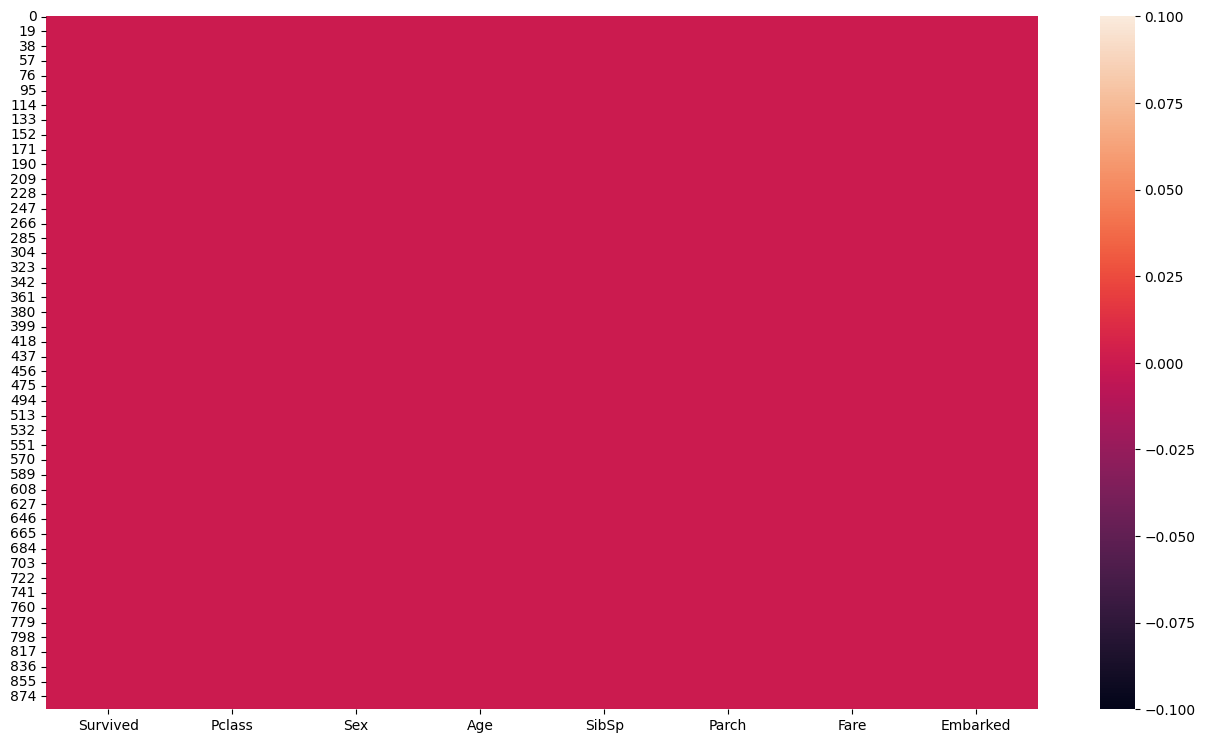

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data_1.isnull())
plt.show()
#shows that no null values are left

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
print("Column 'Sex' before encoding:")
print(data_1["Sex"][0:5])

data_1["Sex"].replace("female", 0, inplace = True)
data_1["Sex"].replace("male", 1, inplace = True)

Column 'Sex' before encoding:
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


In [ ]:
print("Column 'Sex' after encoding:")
print(data_1["Sex"][0:5])

Column 'Sex' after encoding:
0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [ ]:
def encode_(column):

  for data in column:
    if data == 'S':
      column[column.index(data)] = 0
    elif data == 'C':
      column[column.index(data)] = 1
    else:
      column[column.index(data)] = 2

  return column

print("Column 'Embarked' before encoding:")
print(data_1["Embarked"][0:5])

data_1["Embarked"] = encode_(list(data_1["Embarked"]))

print("Column 'Embarked' after encoding:")
print(data_1["Embarked"][0:5])

Column 'Embarked' before encoding:
0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object
Column 'Embarked' after encoding:
0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


In [ ]:
data_1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
X_titanic = data_1.drop(columns = ["Survived"])
y_titanic = data_1["Survived"]

print("Features:", "\n", X_titanic[0:5])
print("Target:", "\n", y_titanic[0:5])


Features: 
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         0
1       1    0  38.0      1      0  71.2833         1
2       3    0  26.0      0      0   7.9250         0
3       1    0  35.0      1      0  53.1000         0
4       3    1  35.0      0      0   8.0500         0
Target: 
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
X_titanic = X_titanic.iloc[:, :].values
y_titanic = y_titanic.iloc[:].values.reshape(-1,1)
X_titanic

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  1.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  0.    , 22.    , ...,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  1.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

Task-2


In [ ]:
X_train_3, X_val_test_3, y_train_3, y_val_test_3 = train_test_split(X_titanic, y_titanic, train_size=.7, random_state=41)
X_val_3, X_test_3 , y_val_3, y_test_3 = train_test_split(X_val_test_3, y_val_test_3, test_size=.333, random_state=41)

In [ ]:
def information_gain(self, parent, l_child, r_child, mode="entropy"):
        # function to compute information gain

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

def entropy(self, y):
        # function to compute entropy

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

TASK - 3

In [ ]:
def conTocat(Y, threshold_value, column_name):
    X = Y.copy(deep=True)
    X[column_name] = X[column_name].apply(lambda x : 1 if x >= threshold_value  else 0)
    return X

def infer(self, x, tree):
    # function to predict a single data point

    if tree.value!=None: return tree.value
    feature_val = x[tree.feature_index]
    if feature_val<=tree.threshold:
      return self.infer(x, tree.left)
    else:
      return self.infer(x, tree.right)




TASK-4 & TASK-5

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):


        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):


        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        # function to find the best split

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split
    def split(self, dataset, feature_index, threshold):
        # function to split the data

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right



    def gini_index(self, y):
        # function to compute gini index

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):
        #function to compute leaf node

        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=" "):
        #function to print the tree

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        #function to train the tree

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        #function to predict new dataset

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        #function to predict a single data point

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        # function to compute information gain

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        # function to compute entropy

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def conTocat(Y, threshold_value, column_name):
       X = Y.copy(deep=True)
       X[column_name] = X[column_name].apply(lambda x : 1 if x >= threshold_value  else 0)
       return X

    def infer(self, x, tree):
    # function to predict a single data point

       if tree.value!=None: return tree.value
       feature_val = x[tree.feature_index]
       if feature_val<=tree.threshold:
          return self.infer(x, tree.left)
       else:
          return self.infer(x, tree.right)

In [ ]:
y_test_3.shape

(90, 1)

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
classifier.fit(X_train_3,y_train_3)

TASK-6

In [ ]:
y_pred_3 = classifier.predict(X_test_3)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_3, y_pred_3)

0.8555555555555555

In [ ]:
if (classifier.infer(X_test_3[11],classifier.root) == 0):
  print('The passenger did not survived.')
else:
  print('The passenger survived')


The passenger did not survived.


TASK-7

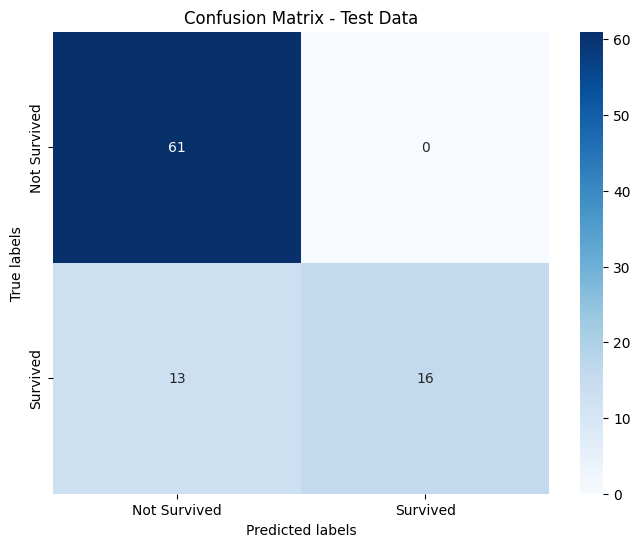

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test_3, y_pred_3)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Data')
plt.show()

TASK-8

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_3, y_pred_3)
recall = recall_score(y_test_3, y_pred_3)
f1 = f1_score(y_test_3, y_pred_3)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 0.5517241379310345
F1-score: 0.7111111111111111


Question 2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics


from statistics import mean
from statistics import stdev
import math

TASK-1: Dataset Exploration

In [ ]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
data = pd.read_csv(url)

# Display the first few rows
print(data.head(10))


      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9
5    8.7    7.2
6   57.5   11.8
7  120.2   13.2
8    8.6    4.8
9  199.8   10.6


In [ ]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


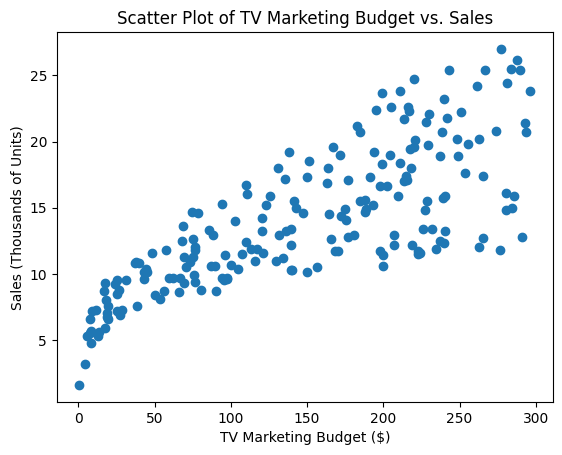

In [ ]:


# Plotting the scatter plot
plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV Marketing Budget ($)')
plt.ylabel('Sales (Thousands of Units)')
plt.title('Scatter Plot of TV Marketing Budget vs. Sales')
plt.show()


In [ ]:
# Calculating basic statistical measures
print("TV Marketing Budget - Mean:", data['TV'].mean(), "Standard Deviation:", data['TV'].std())
print("Sales - Mean:", data['Sales'].mean(), "Standard Deviation:", data['Sales'].std())


TV Marketing Budget - Mean: 147.0425 Standard Deviation: 85.85423631490808
Sales - Mean: 14.0225 Standard Deviation: 5.217456565710478


Task-2: Data Processing

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values per column
print(missing_values)




TV       0
Sales    0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Columns to normalize
columns_to_normalize = ['TV','Sales']

# Apply normalization and update the dataframe
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Display the first few rows to verify normalization
print(data.head())


         TV     Sales
0  0.775786  0.807087
1  0.148123  0.346457
2  0.055800  0.303150
3  0.509976  0.665354
4  0.609063  0.444882


In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature and target variable
X = data[['TV']] # Feature: TV marketing budget
y = data['Sales'] # Target: Sales

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
X_train

Training set size: 160
Testing set size: 40


,TV
79,0.389922
197,0.596212
38,0.143389
24,0.208319
122,0.755157
...,...
106,0.082178
14,0.687859
92,0.733852
179,0.557660


Task-3:Linear regression implementation

In [ ]:
import numpy as np

# Hypothesis function: h(x) = w1*x + w0
def hypothesis(x, w0, w1):
    return w0 + w1*x

# Mean Squared Error cost function
def cost_function(X, y, w0, w1):
    m = len(y)
    cost = sum([(hypothesis(X[i], w0, w1) - y[i])**2 for i in range(m)]) / (2*m)
    return cost

X_train_np = X_train.squeeze().values
y_train_np = y_train.values

# Gradient Descent to update parameters w0 and w1
def gradient_descent(X, y, w0, w1, learning_rate, iterations, tolerance):
    m = len(y)
    cost_history = [0] * iterations

    for iteration in range(iterations):
        y_pred = hypothesis(X, w0, w1)
        loss = y_pred - y

        w0_gradient = np.sum(loss) / m
        w1_gradient = np.sum(loss * X) / m

        w0 = w0 - (learning_rate * w0_gradient)
        w1 = w1 - (learning_rate * w1_gradient)

        cost = cost_function(X, y, w0, w1)
        cost_history[iteration] = cost

        # If the cost change is less than the tolerance, break out of the loop
        if iteration > 0 and abs(cost_history[iteration-1] - cost) < tolerance:
            break

    return w0, w1, cost_history[iteration]

# Parameters
w0 = 0
w1 = 0
learning_rate = 0.2
iterations = 10000
tolerance = 1e-6


w0, w1, last_iteration_cost = gradient_descent(X_train_np, y_train_np, w0, w1, learning_rate, iterations, tolerance)

print(f"Learned parameters after {iterations} iterations: w0 = {w0}, w1 = {w1}")
print(f"Cost at last iteration: {last_iteration_cost}")


Learned parameters after 10000 iterations: w0 = 0.23492407987288863, w1 = 0.5114008396364986
Cost at last iteration: 0.008255492661110109


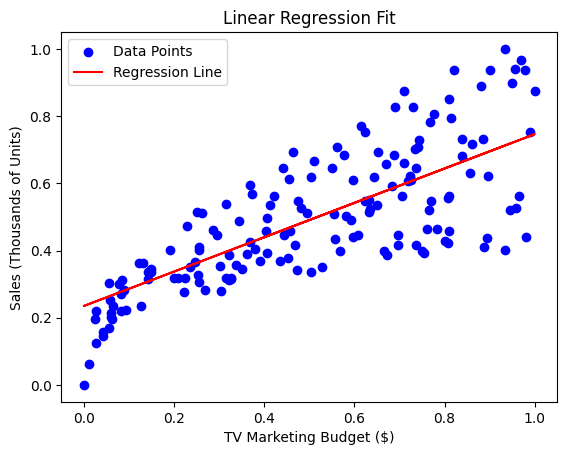

In [ ]:

plt.scatter(X_train, y_train, color='blue', label='Data Points')
plt.plot(X_train, hypothesis(X_train_np, w0, w1), color='red', label='Regression Line')
plt.xlabel('TV Marketing Budget ($)')
plt.ylabel('Sales (Thousands of Units)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


Task-4: Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = hypothesis(X_test.squeeze().values, w0, w1)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error on test set: {mse}")
print(f"Mean Absolute Error on test set: {mae}")


Mean Squared Error on test set: 0.016174951651880896
Mean Absolute Error on test set: 0.09873417835977978


Question-3

Task-1: Data Exploration

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


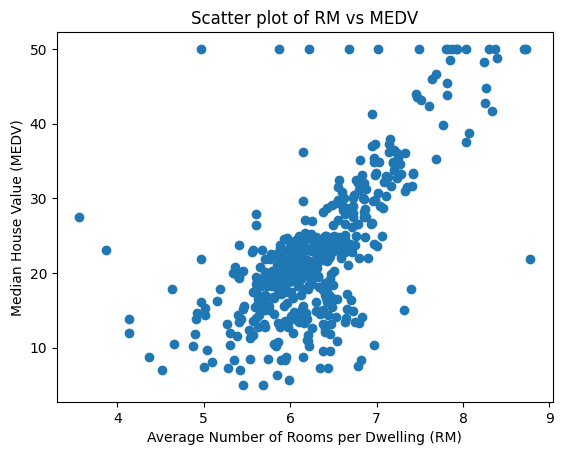

Mean RM: 6.284634387351779, Standard Deviation RM: 0.7026171434153233
Mean MEDV: 22.532806324110677, Standard Deviation MEDV: 9.197104087379818


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load the Boston Housing dataset

boston_data = pd.read_csv("/content/bostonHousingData.csv")
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Assign column names
boston_data.columns = column_names

# Display the first few rows
print(boston_data.head())

# Plot a scatter plot to visualize the relationship between a feature (e.g., RM) and house rent (MEDV)
plt.scatter(boston_data['RM'], boston_data['MEDV'])
plt.title('Scatter plot of RM vs MEDV')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median House Value (MEDV)')
plt.show()

# Calculate and display basic statistical measures
mean_rm = boston_data['RM'].mean()
std_rm = boston_data['RM'].std()
mean_medv = boston_data['MEDV'].mean()
std_medv = boston_data['MEDV'].std()

print(f'Mean RM: {mean_rm}, Standard Deviation RM: {std_rm}')
print(f'Mean MEDV: {mean_medv}, Standard Deviation MEDV: {std_medv}')


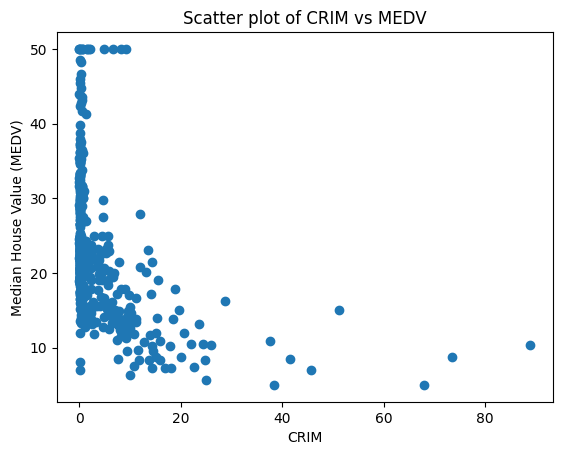

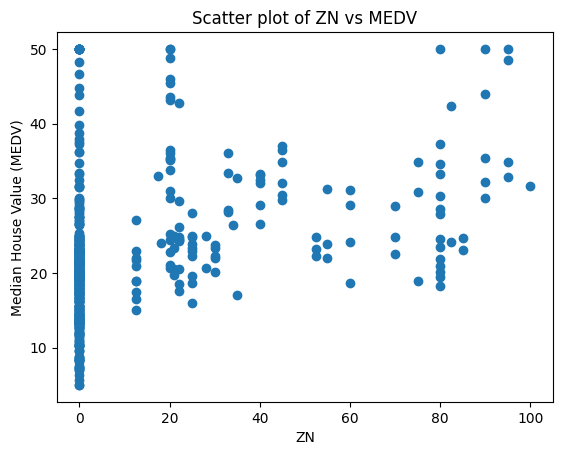

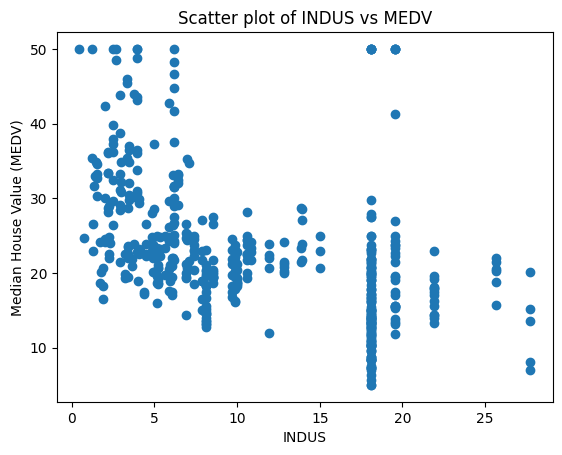

In [ ]:
plt.scatter(boston_data['CRIM'], boston_data['MEDV'])
plt.title('Scatter plot of CRIM vs MEDV')
plt.xlabel('CRIM')
plt.ylabel('Median House Value (MEDV)')
plt.show()
plt.scatter(boston_data['ZN'], boston_data['MEDV'])
plt.title('Scatter plot of ZN vs MEDV')
plt.xlabel('ZN')
plt.ylabel('Median House Value (MEDV)')
plt.show()
plt.scatter(boston_data['INDUS'], boston_data['MEDV'])
plt.title('Scatter plot of INDUS vs MEDV')
plt.xlabel('INDUS')
plt.ylabel('Median House Value (MEDV)')
plt.show()

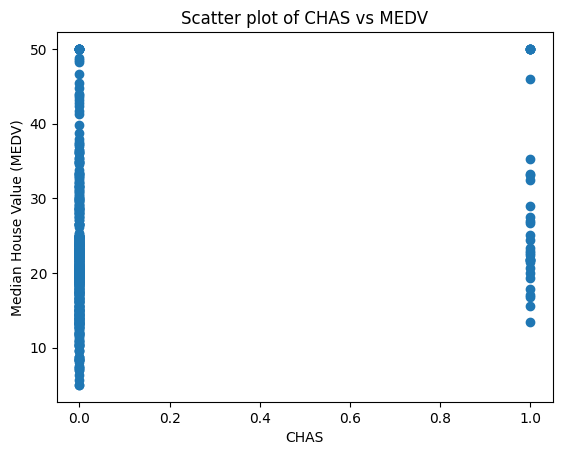

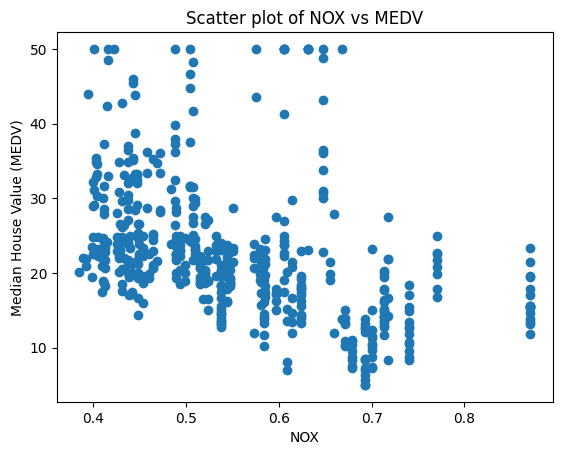

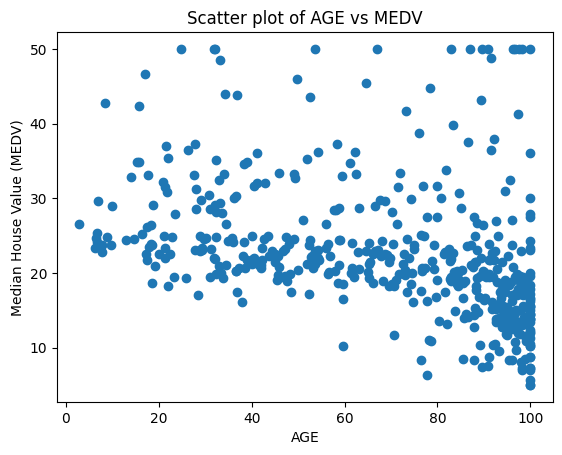

In [ ]:
plt.scatter(boston_data['CHAS'], boston_data['MEDV'])
plt.title('Scatter plot of CHAS vs MEDV')
plt.xlabel('CHAS')
plt.ylabel('Median House Value (MEDV)')
plt.show()
plt.scatter(boston_data['NOX'], boston_data['MEDV'])
plt.title('Scatter plot of NOX vs MEDV')
plt.xlabel('NOX')
plt.ylabel('Median House Value (MEDV)')
plt.show()
plt.scatter(boston_data['AGE'], boston_data['MEDV'])
plt.title('Scatter plot of AGE vs MEDV')
plt.xlabel('AGE')
plt.ylabel('Median House Value (MEDV)')
plt.show()

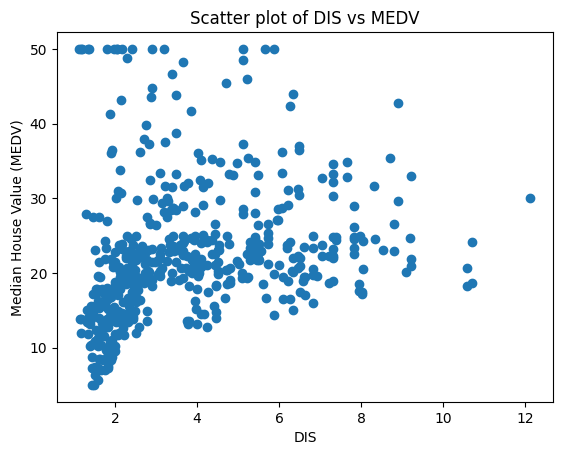

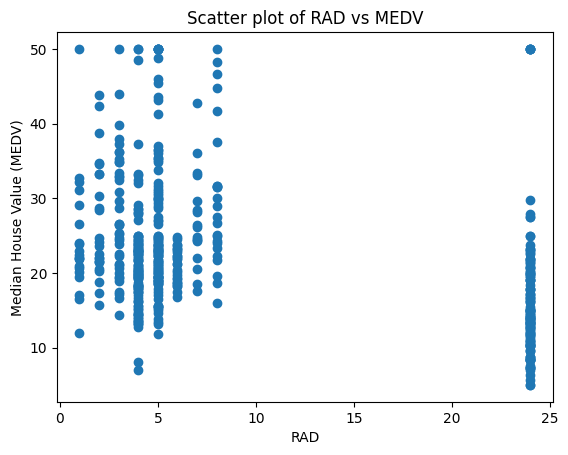

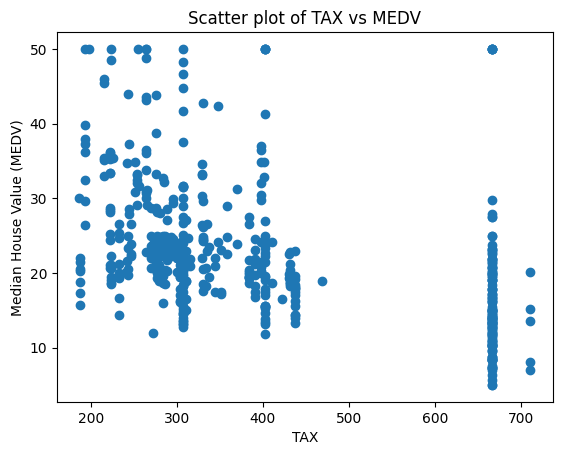

In [ ]:
plt.scatter(boston_data['DIS'], boston_data['MEDV'])
plt.title('Scatter plot of DIS vs MEDV')
plt.xlabel('DIS')
plt.ylabel('Median House Value (MEDV)')
plt.show()
plt.scatter(boston_data['RAD'], boston_data['MEDV'])
plt.title('Scatter plot of RAD vs MEDV')
plt.xlabel('RAD')
plt.ylabel('Median House Value (MEDV)')
plt.show()
plt.scatter(boston_data['TAX'], boston_data['MEDV'])
plt.title('Scatter plot of TAX vs MEDV')
plt.xlabel('TAX')
plt.ylabel('Median House Value (MEDV)')
plt.show()

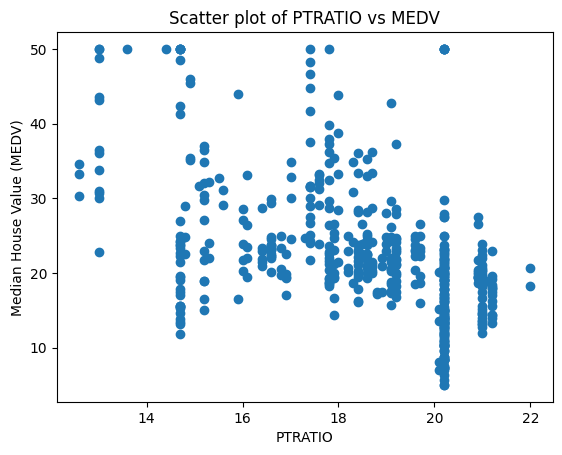

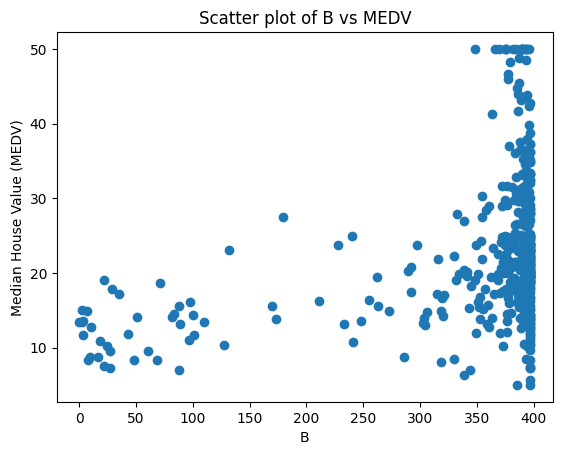

In [ ]:
plt.scatter(boston_data['PTRATIO'], boston_data['MEDV'])
plt.title('Scatter plot of PTRATIO vs MEDV')
plt.xlabel('PTRATIO')
plt.ylabel('Median House Value (MEDV)')
plt.show()
plt.scatter(boston_data['B'], boston_data['MEDV'])
plt.title('Scatter plot of B vs MEDV')
plt.xlabel('B')
plt.ylabel('Median House Value (MEDV)')
plt.show()

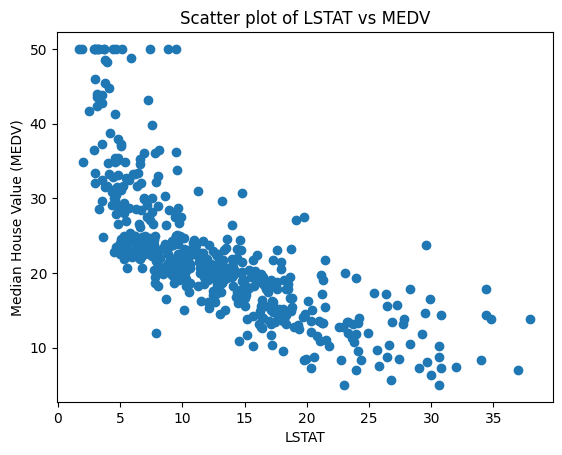

In [ ]:
plt.scatter(boston_data['LSTAT'], boston_data['MEDV'])
plt.title('Scatter plot of LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('Median House Value (MEDV)')
plt.show()

In [ ]:
boston_data.shape

(506, 14)

In [ ]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
boston_data.select_dtypes(include=['object']).columns

Index([], dtype='object')

Task-2: Data Processing

In [ ]:
missing_values = boston_data.isnull().sum()

print(missing_values)


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
boston_data.columns[boston_data.isnull().any()]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT'], dtype='object')

In [ ]:
len(boston_data.columns[boston_data.isnull().any()])

6

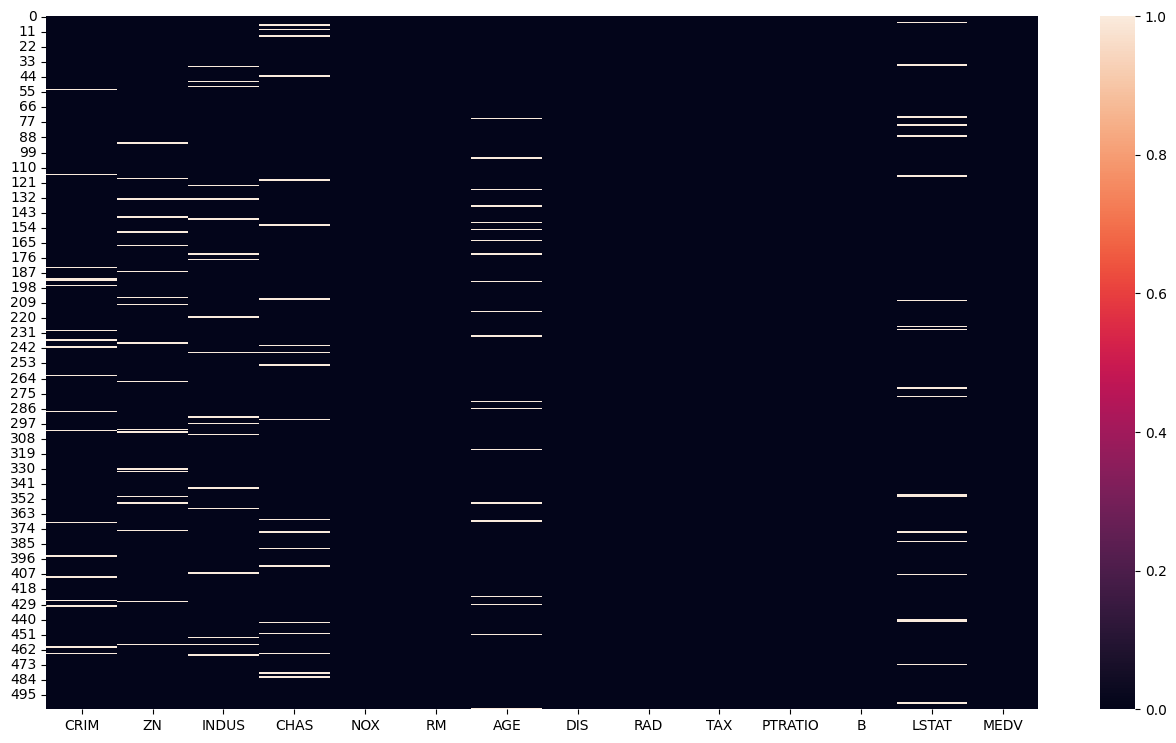

In [ ]:
# show the null values using the heatmap
plt.figure(figsize=(16,9))
sns.heatmap(boston_data.isnull())
plt.show()

In [ ]:
print(boston_data.shape)
null_percent = boston_data.isnull().sum() / boston_data.shape[0] * 100
print(null_percent)

(506, 14)
CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64


In [ ]:
col_for_drop = null_percent[null_percent > 50].keys()
col_for_drop

Index([], dtype='object')

In [ ]:
#no columns dropped till now because none of the columns have unknown values greater than 50%
#fill missing positions with column mean
#boston_data['CRIM '] = boston_data['CRIM '].fillna(boston_data['CRIM '].mean())
boston_data['ZN'] = boston_data['ZN'].fillna(boston_data['ZN'].mean())
boston_data['INDUS'] = boston_data['INDUS'].fillna(boston_data['INDUS'].mean())
boston_data['CHAS'] = boston_data['CHAS'].fillna(boston_data['CHAS'].mean())
boston_data['AGE'] = boston_data['AGE'].fillna(boston_data['AGE'].mean())
#boston_data['LSTAT'] = boston_data['LSTAT'].fillna(boston_data['LSTAT '].mean())
print(boston_data.columns[boston_data.isnull().any()])

Index(['CRIM', 'LSTAT'], dtype='object')


In [ ]:
len(boston_data.columns[boston_data.isnull().any()])

2

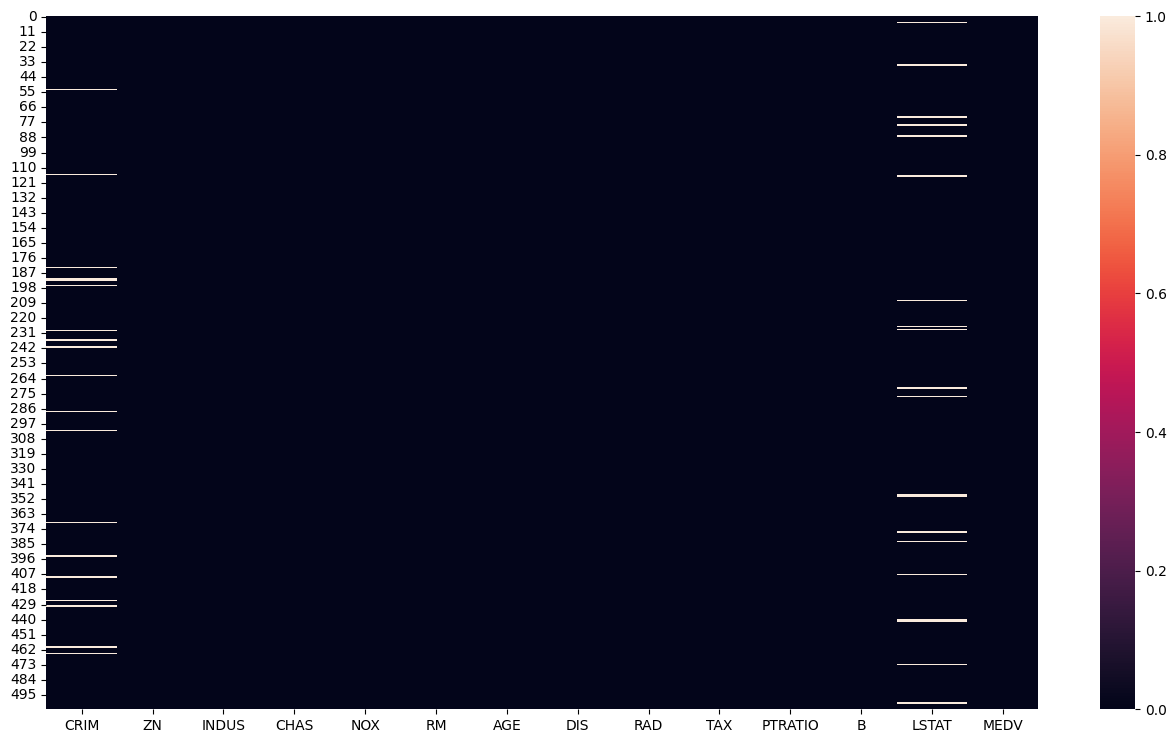

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(boston_data.isnull())
plt.show()

In [ ]:
boston_data['CRIM'] = boston_data['CRIM'].fillna(boston_data['CRIM'].mode()[0])
boston_data['LSTAT'] = boston_data['LSTAT'].fillna(boston_data['LSTAT'].mode()[0])

In [ ]:
len(boston_data.columns[boston_data.isnull().any()])

0

In [ ]:
boston_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.000000,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.000000,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.000000,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.000000,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.000000,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,6.36,36.2
5,0.02985,0.0,2.18,0.000000,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.069959,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.000000,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.000000,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.069959,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


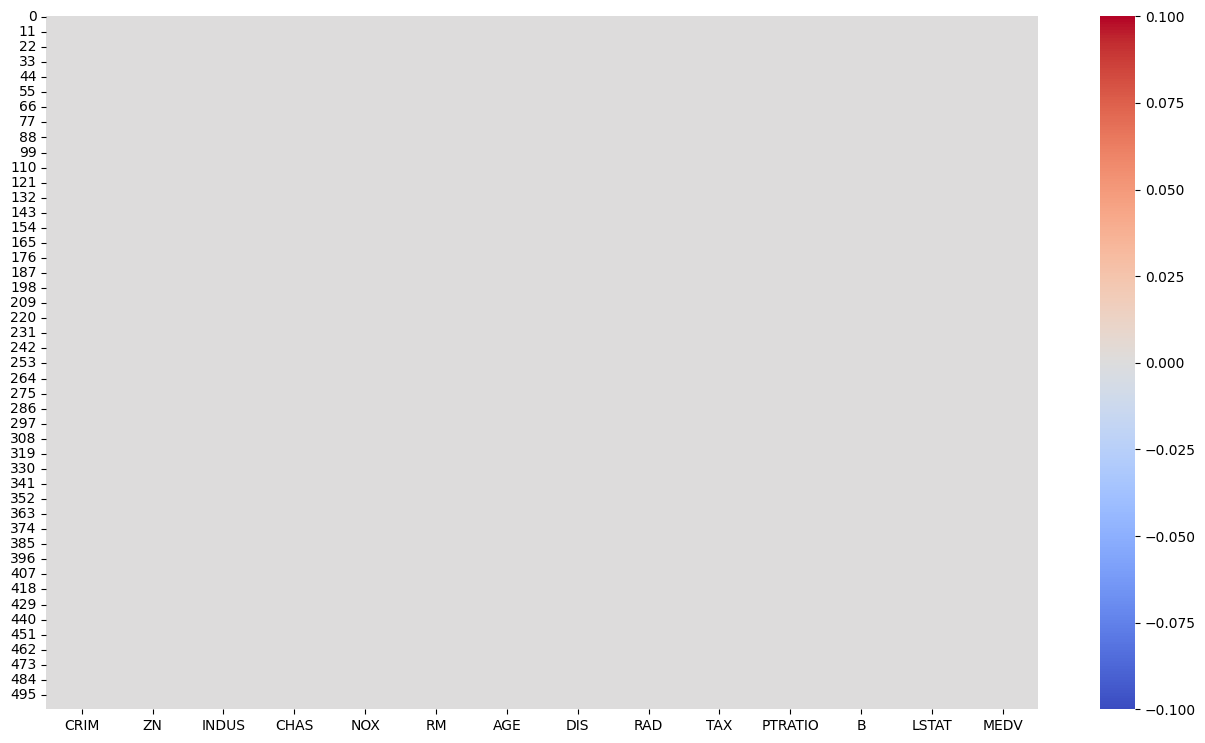

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(boston_data.isnull(), cmap='coolwarm')
plt.show()

In [ ]:
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Columns to normalize
columns_after_normalization = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']
scaler = MinMaxScaler()
# Apply normalization and update the dataframe
boston_data[columns_after_normalization] = scaler.fit_transform(boston_data[columns_after_normalization])

# Display the first few rows to verify normalization
print(boston_data.head(100))

        CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0   0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1   0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2   0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3   0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4   0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..       ...   ...       ...   ...       ...       ...       ...       ...   
95  0.001301  0.00  0.089076   0.0  0.123457  0.587086  0.565396  0.215115   
96  0.001222  0.00  0.089076   0.0  0.123457  0.498563  0.686921  0.215115   
97  0.001287  0.00  0.089076   0.0  0.123457  0.863767  0.752832  0.215115   
98  0.000849  0.00  0.089076   0.0  0.123457  0.816057  0.350154  0.215115   
99  0.000700  0.00  0.089076   0.0  0.123457  0.738647  0.613800  0.215115   

         RAD       TAX   PTRATIO         B     LSTAT      MEDV 

In [ ]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.038928,0.112119,0.389443,0.069959,0.349167,0.521869,0.675783,0.242381,0.371713,0.422208,0.622929,0.898568,0.296198,0.389618
std,0.096375,0.229211,0.245571,0.250233,0.238431,0.134627,0.282590,0.191482,0.378576,0.321636,0.230313,0.230205,0.196508,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000703,0.000000,0.173387,0.000000,0.131687,0.445392,0.443100,0.088259,0.130435,0.175573,0.510638,0.945730,0.134106,0.267222
50%,0.002454,0.000000,0.346041,0.000000,0.314815,0.507281,0.736869,0.188949,0.173913,0.272901,0.686170,0.986232,0.253725,0.360000
75%,0.031498,0.112119,0.646628,0.000000,0.491770,0.586798,0.933831,0.369088,1.000000,0.914122,0.808511,0.998298,0.409492,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Train-test split
X = boston_data.iloc[:, :-1].values
y = boston_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (404, 13)
Testing set size: (102, 13)


Task-3: Linear Regression and Gradient Descent implementation

<Axes: >

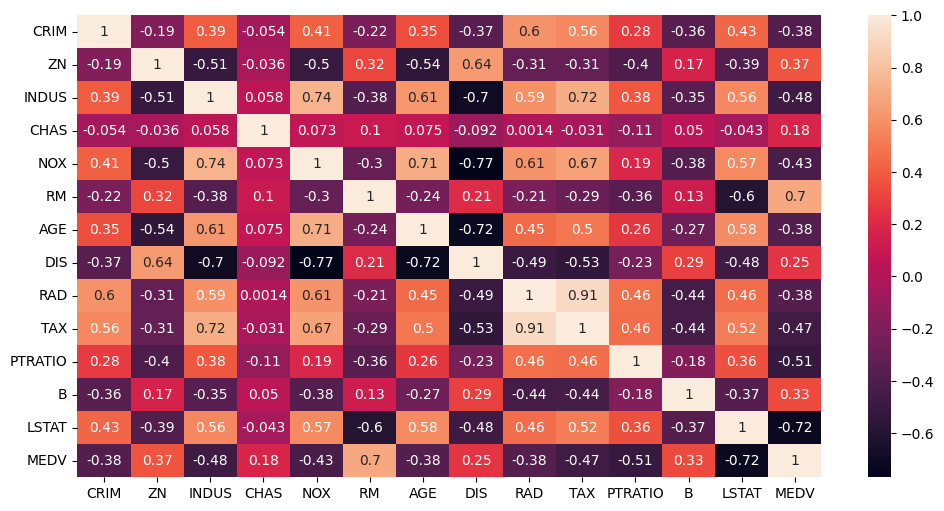

In [ ]:
plt.figure(figsize=(12,6))
corr_val=boston_data.corr()
sns.heatmap(data=corr_val,annot=True)

In [ ]:
#Etracting all features which is highly correlated with target
def HighlyCorrelated(data,threshold):
    feature=[]
    values=[]
    for ele,index in enumerate(data.index):
        if abs(data[index])> threshold:
            feature.append(index)
            values.append(data[index])
    df=pd.DataFrame(data=values,index=feature,columns= ["Correlation"])
    return df
threshold=0.5
corr_df=HighlyCorrelated(corr_val.MEDV,threshold)
corr_df

,Correlation
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.718649
MEDV,1.000000


In [ ]:
# Stochastic Gradient Descent Implementation
class Stoc_Grad_Des:
    def __init__(self, learning_rate, epochs):
        self.m = None
        self.b = None
        self.lrn_rate = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        self.b = 0
        self.m = np.ones(X_train.shape[1])
        for _ in range(self.epochs):
            for i in range(X_train.shape[0]):
                y_hat = np.dot(X_train[i], self.m) + self.b
                self.b -= self.lrn_rate * (-2 * (y_train[i] - y_hat))
                self.m -= self.lrn_rate * (-2 * (y_train[i] - y_hat) * X_train[i])

    def predict(self, X_test):
        return np.dot(X_test, self.m) + self.b

In [ ]:
X_train

array([[1.68788358e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 8.80427656e-01, 6.39624724e-01],
       [6.98067706e-03, 0.00000000e+00, 2.81524927e-01, ...,
        8.93617021e-01, 9.96772404e-01, 1.85982340e-01],
       [3.18534767e-04, 1.12119342e-01, 2.05278592e-01, ...,
        4.57446809e-01, 9.12627969e-01, 1.68322296e-01],
       ...,
       [9.76735048e-05, 8.00000000e-01, 5.68181818e-02, ...,
        4.68085106e-01, 9.84971506e-01, 1.17549669e-01],
       [1.25369170e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 2.76186394e-01, 5.94370861e-01],
       [2.50017197e-03, 0.00000000e+00, 2.96920821e-01, ...,
        8.82978723e-01, 1.77719502e-01, 2.45584989e-01]])

In [ ]:
y_train

array([0.15555556, 0.33111111, 0.32      , 0.18666667, 0.29333333,
       0.43555556, 0.35777778, 0.43777778, 0.08222222, 0.5       ,
       0.34888889, 0.69333333, 0.59111111, 0.14888889, 0.77333333,
       0.19777778, 0.37333333, 0.41555556, 0.28      , 0.43111111,
       0.08444444, 0.31555556, 0.45111111, 0.34222222, 0.40222222,
       0.73111111, 0.23555556, 0.89777778, 0.23777778, 0.39111111,
       0.21111111, 0.30444444, 0.28444444, 0.24666667, 0.34666667,
       0.59111111, 0.53555556, 0.23555556, 0.27777778, 0.38888889,
       0.32      , 0.31777778, 0.07777778, 0.34666667, 0.26666667,
       0.26888889, 0.21111111, 1.        , 0.20666667, 0.16888889,
       0.52666667, 0.36      , 0.31777778, 0.40222222, 0.31333333,
       0.44444444, 0.63111111, 0.        , 0.54666667, 0.30444444,
       0.37111111, 0.40222222, 0.39555556, 0.35555556, 0.97333333,
       0.21333333, 0.25777778, 0.49111111, 0.33555556, 0.32888889,
       0.35555556, 0.80666667, 0.40444444, 0.34222222, 0.3    

In [ ]:
lrm = Stoc_Grad_Des(0.01, 500)
lrm.fit(X_train, y_train)

In [ ]:
y_train_pred=lrm.predict(X_train)
df1=pd.DataFrame({"Actual_train":y_train,"Predicted_train":y_train_pred})
df2=df1.head()
df2

,Actual_train,Predicted_train
0,0.155556,0.151510
1,0.331111,0.321014
2,0.320000,0.390887
3,0.186667,0.186958
4,0.293333,0.299531


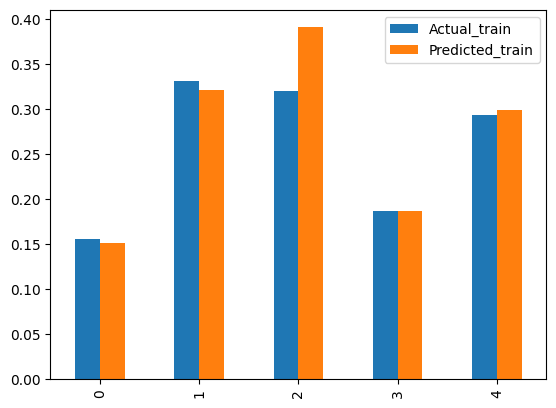

In [ ]:
df2.plot(kind="bar")
plt.show()

In [ ]:
y_test_pred=lrm.predict(X_test)
df3=pd.DataFrame({"Actual_test":y_test,"Predicted_test":y_test_pred})
df4=df3.head()
df4

,Actual_test,Predicted_test
0,0.413333,0.542913
1,0.608889,0.705694
2,0.191111,0.233521
3,0.395556,0.447678
4,0.246667,0.325473


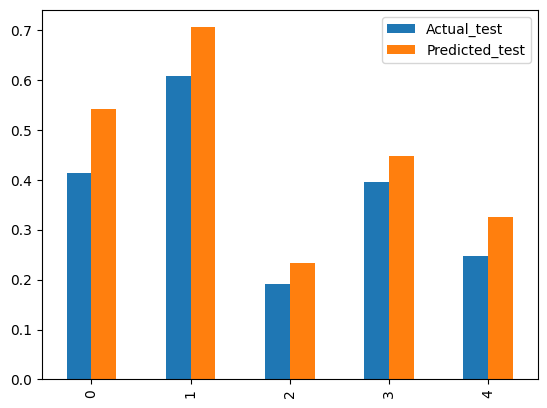

In [ ]:
df4.plot(kind="bar")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_train,y_train_pred))
print("MAE:",metrics.mean_absolute_error(y_train,y_train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print("R_squared:",r2_score(y_train,y_train_pred))


MSE: 0.01130352473695203
MAE: 0.0768031555136931
RMSE: 0.10631803580273683
R_squared: 0.7365173162048462


Task-4: Evaluation

In [ ]:
print("MSE:",metrics.mean_squared_error(y_test,y_test_pred))
print("MAE:",metrics.mean_absolute_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print("R_squared:",r2_score(y_test,y_test_pred))

MSE: 0.012414484577084514
MAE: 0.07480547859538986
RMSE: 0.11142030594592942
R_squared: 0.6571930400258184
